<a id = "1.0"></a>
<p style="font-size:30px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong><i>Clasificacion Multi Categoria</i></strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>Fuente: <a href="https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Multi%20label%20text%20classification.ipynb" target=\"_blank\">Ejemplo curado para la clase</a></strong></p>  

In [1]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
from nltk.corpus import stopwords

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
%matplotlib inline

<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<a href="https://github.com/mrthlinh/toxic-comment-classification/blob/master/data/data_train_clean.csv" target=\"_blank\">Descargar el Conjunto de Datos</a></p> 

In [7]:
df = pd.read_csv("./data/data_train_clean.csv", encoding = "ISO-8859-1")

In [8]:
df.shape

(159571, 8)

In [9]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [11]:
df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
158118,e9077221bde184e2,""" July 2006 (UTC)\nYes, only Sanandana was cal...",0,0,0,0,0,0
41344,6e41e91ac23dcd14,"""\n\n The Great One! \nI dont really have a pr...",0,0,1,0,1,1
85554,e4d61f8f575733b7,From Renata3 talk \n\n(Let's leave innocent by...,0,0,0,0,0,0
31823,548dcbda589b4f0b,""":I have no problem accepting your request, Sc...",0,0,0,0,0,0
138297,e3f91a794d353039,"""\n\n User: Vaishnava on the Article: Vishnu \...",0,0,0,0,0,0
28287,4ae412914a50f1ae,]]\n [[/Archive2|November 2006 - 2 months ago,0,0,0,0,0,0
145763,21e15cabb02cd650,REDIRECT User talk:AlexOvShaolin/Archive 1,0,0,0,0,0,0
54406,9160bda3e6019048,""":::::: Thanks - although his vile accusation...",0,0,0,0,0,0
129146,b2b05293919004d4,"""\n\nSurvey\nStrong oppose as we speak not onl...",0,0,0,0,0,0
11033,1d28a16e89b83dec,MAYBE ITS BECAUSE YOU ARE A GAY,1,0,0,0,1,1


In [12]:
df.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>Contar la cantidad de comentarios por categoria</i></strong></p> 

In [13]:
df_toxic = df.drop(['id', 'comment_text'], axis=1)

In [14]:
categories = list(df_toxic.columns.values)

In [15]:
counts = []
for i in categories:
    counts.append((i, df_toxic[i].sum()))

In [16]:
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>Gráfica comentarios por categoria</i></strong></p> 

Text(0.5, 0, 'Categoria')

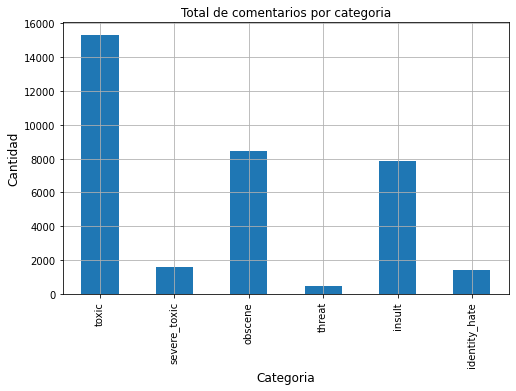

In [17]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Total de comentarios por categoria")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Categoria', fontsize=12)

In [18]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Categorias')

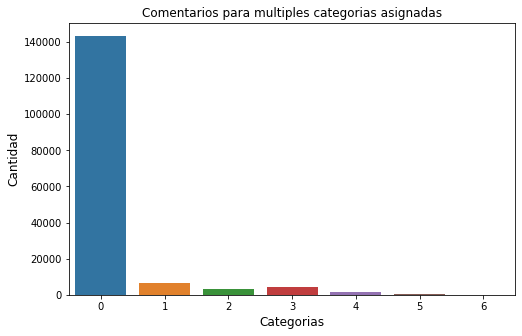

In [19]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Comentarios para Múltiples categorias asignadas")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Categorias', fontsize=12)

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>Evaluar longitud de los comentarios</i></strong></p> 

<AxesSubplot:>

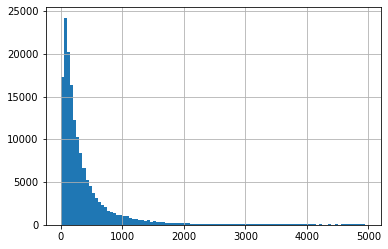

In [20]:
lens = df.comment_text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [21]:
fltNoLavel = len(df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) & (df['threat']== 0) & (df['insult']==0) & (df['identity_hate']==0)])
fltPrc = fltNoLavel / len(df)
print('Total de comentarios no rotulados: ' + str(fltNoLavel))
print('Total de comentarios rotulados: ' + str(len(df) - fltNoLavel))
print('Porcentaje de comentarios no rotulados: ' + str(fltPrc))
print('Cantidad de comentarios nulos: ' + str(df['comment_text'].isnull().sum()))

Total de comentarios no rotulados: 143346
Total de comentarios rotulados: 16225
Porcentaje de comentarios no rotulados: 0.8983211235124177
Cantidad de comentarios nulos: 0


In [22]:
print('Ejemplo de comentario:')
df['comment_text'][0]

Ejemplo de comentario:


"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>Rótulos de Categorias</i></strong></p> 

In [23]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>Limpieza de datos</i></strong></p> 

In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [25]:
df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))

In [26]:
df['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now 89 205 38 27'

<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>Separar datos para entrenamiento y prueba</i></strong></p> 

In [27]:
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

In [28]:
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106912,)
(52659,)


<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong><i>OneVsRestClassifier</i></strong>: <br>También conocida como uno-vs-todos.<br> Esta estrategia consiste en ajustar un clasificador por clase.<br>Como cada clase está representada por un clasificador solamente.</p> 

In [29]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
                ])

In [30]:
for category in categories:
    print('Procesando Categoria: {}'.format(category))
    NB_pipeline.fit(X_train, train[category])
    prediction = NB_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(test[category], prediction)))

Procesando Categoria: toxic
Accuracy: 0.9192350785240889
Procesando Categoria: severe_toxic
Accuracy: 0.9900112041626312
Procesando Categoria: obscene
Accuracy: 0.9515752293055318
Procesando Categoria: threat
Accuracy: 0.9971135038644866
Procesando Categoria: insult
Accuracy: 0.9517271501547694
Procesando Categoria: identity_hate
Accuracy: 0.9910556600011394


In [31]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
                ])

In [32]:
for category in categories:
    print('Procesando Categoria: {}'.format(category))
    SVC_pipeline.fit(X_train, train[category])
    prediction = SVC_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(test[category], prediction)))

Procesando Categoria: toxic
Accuracy: 0.9600068364382157
Procesando Categoria: severe_toxic
Accuracy: 0.9906948479842003
Procesando Categoria: obscene
Accuracy: 0.9788830019559809
Procesando Categoria: threat
Accuracy: 0.9974363356691164
Procesando Categoria: insult
Accuracy: 0.971135038644866
Procesando Categoria: identity_hate
Accuracy: 0.9919861752027194


In [33]:
LogReg_pipeline = Pipeline([
                            ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                            ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
                           ])

In [34]:
for category in categories:
    print('Procesando Categoria: {}'.format(category))
    LogReg_pipeline.fit(X_train, train[category])
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(test[category], prediction)))

Procesando Categoria: toxic
Accuracy: 0.9548415275641391
Procesando Categoria: severe_toxic
Accuracy: 0.9910746501072941
Procesando Categoria: obscene
Accuracy: 0.9760724662450863
Procesando Categoria: threat
Accuracy: 0.9973603752444976
Procesando Categoria: insult
Accuracy: 0.9687422852693747
Procesando Categoria: identity_hate
Accuracy: 0.991758293928863


<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 
<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Avantgarde';text-align:center;border-radius:5px;">
<strong>______________________________</strong></p> 